In [1]:
!mkdir tsukuba

A subdirectory or file tsukuba already exists.


In [2]:
import zipfile

with zipfile.ZipFile('tsukuba.zip', 'r') as f:
    f.extractall('tsukuba')

In [3]:
!mkdir aloe

A subdirectory or file aloe already exists.


In [4]:
with zipfile.ZipFile('Aloe_images.zip', 'r') as f:
    f.extractall('aloe')

In [16]:
# PROBLEM 1:
import cv2
import numpy as np

saving_message = 'Saving result...'

def distance(x, y):
    return abs(x - y)

def pixel_wise_matching(left_img, right_img, disparity_range, save_result=True):
    # Read lef, right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create placeholder for disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                cost = max_value
                if x - j >= 0:
                    cost = distance(int(left[y, x]), int(right[y, x - j]))
                if cost < cost_min:
                    cost_min = cost
                    disparity = j
            
            # Let depth at (y,x) = j (disparity)
            # Multiply by a scale factor for visualizaation purpose
            depth[y, x] = disparity * scale

    if save_result is True:
        print(saving_message)
        # Save results
        cv2.imwrite("pixel_wise_l1.png", depth)
        cv2.imwrite("pixel_wise_l1_color.png", cv2.applyColorMap(
            depth, cv2.COLORMAP_JET
        ))
    
    print('Done')
    return depth



In [17]:
import matplotlib.pyplot as plt

left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'
disparity_range = 16


pixelwise_result = pixel_wise_matching(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)


Saving result...
Done


# Using L1 distance & L2 distance

In [18]:
def get_l1_distance(x, y):
    return abs(x - y)

def get_l2_distance(x, y):
    return (x - y)**2



In [56]:
def pixel_wise_matching_l1(left_img_path, right_img_path, disparity_range, save_result=True):
    # Read images and convert to grayscale
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create displarity map placeholder
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                cost = max_value
                if (x -j >= 0):
                    cost = get_l1_distance(
                        int(left[y, x]),
                        int(right[y, x - j])
                    )

                if cost < cost_min:
                    cost_min = cost
                    disparity = j
            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization
            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        cv2.imwrite("disparity_map_l1.png", depth)
        cv2.imwrite("disparity_map_l1_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')
    return depth


In [57]:
import matplotlib.pyplot as plt

left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'
disparity_range = 16


pixelwise_result = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

Saving result...
Done


### Show disparity maps using L1 distance

(-0.5, 383.5, 287.5, -0.5)

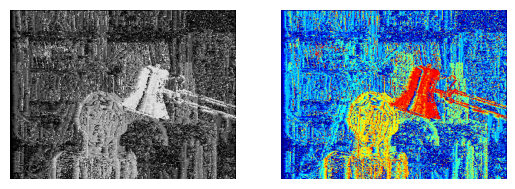

In [59]:
from PIL import Image
map1_path = 'disparity_map_l1.png'
map2_path = 'disparity_map_l1_color.png'

map1_img = Image.open(map1_path).convert('RGB')
map2_img = Image.open(map2_path).convert('RGB')
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(map1_img)
ax2.imshow(map2_img)
ax1.axis('off')
ax2.axis('off')

In [64]:
def pixel_wise_matching_l2(left_img_path, right_img_path, disparity_range, save_result=True):
    # Read images and convert to grayscale
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create displarity map placeholder
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                cost = max_value
                if (x -j >= 0):
                    cost = get_l2_distance(
                        int(left[y, x]),
                        int(right[y, x - j])
                    )

                if cost < cost_min:
                    cost_min = cost
                    disparity = j
            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization
            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        cv2.imwrite(f"disparity_map_l2.png", depth)
        cv2.imwrite(f"disparity_map_l2_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')
    return depth


In [65]:
import matplotlib.pyplot as plt

left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'
disparity_range = 16


pixelwise_result_l2 = pixel_wise_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

Saving result...
Done


### Show disparity maps using L2 distance

(-0.5, 383.5, 287.5, -0.5)

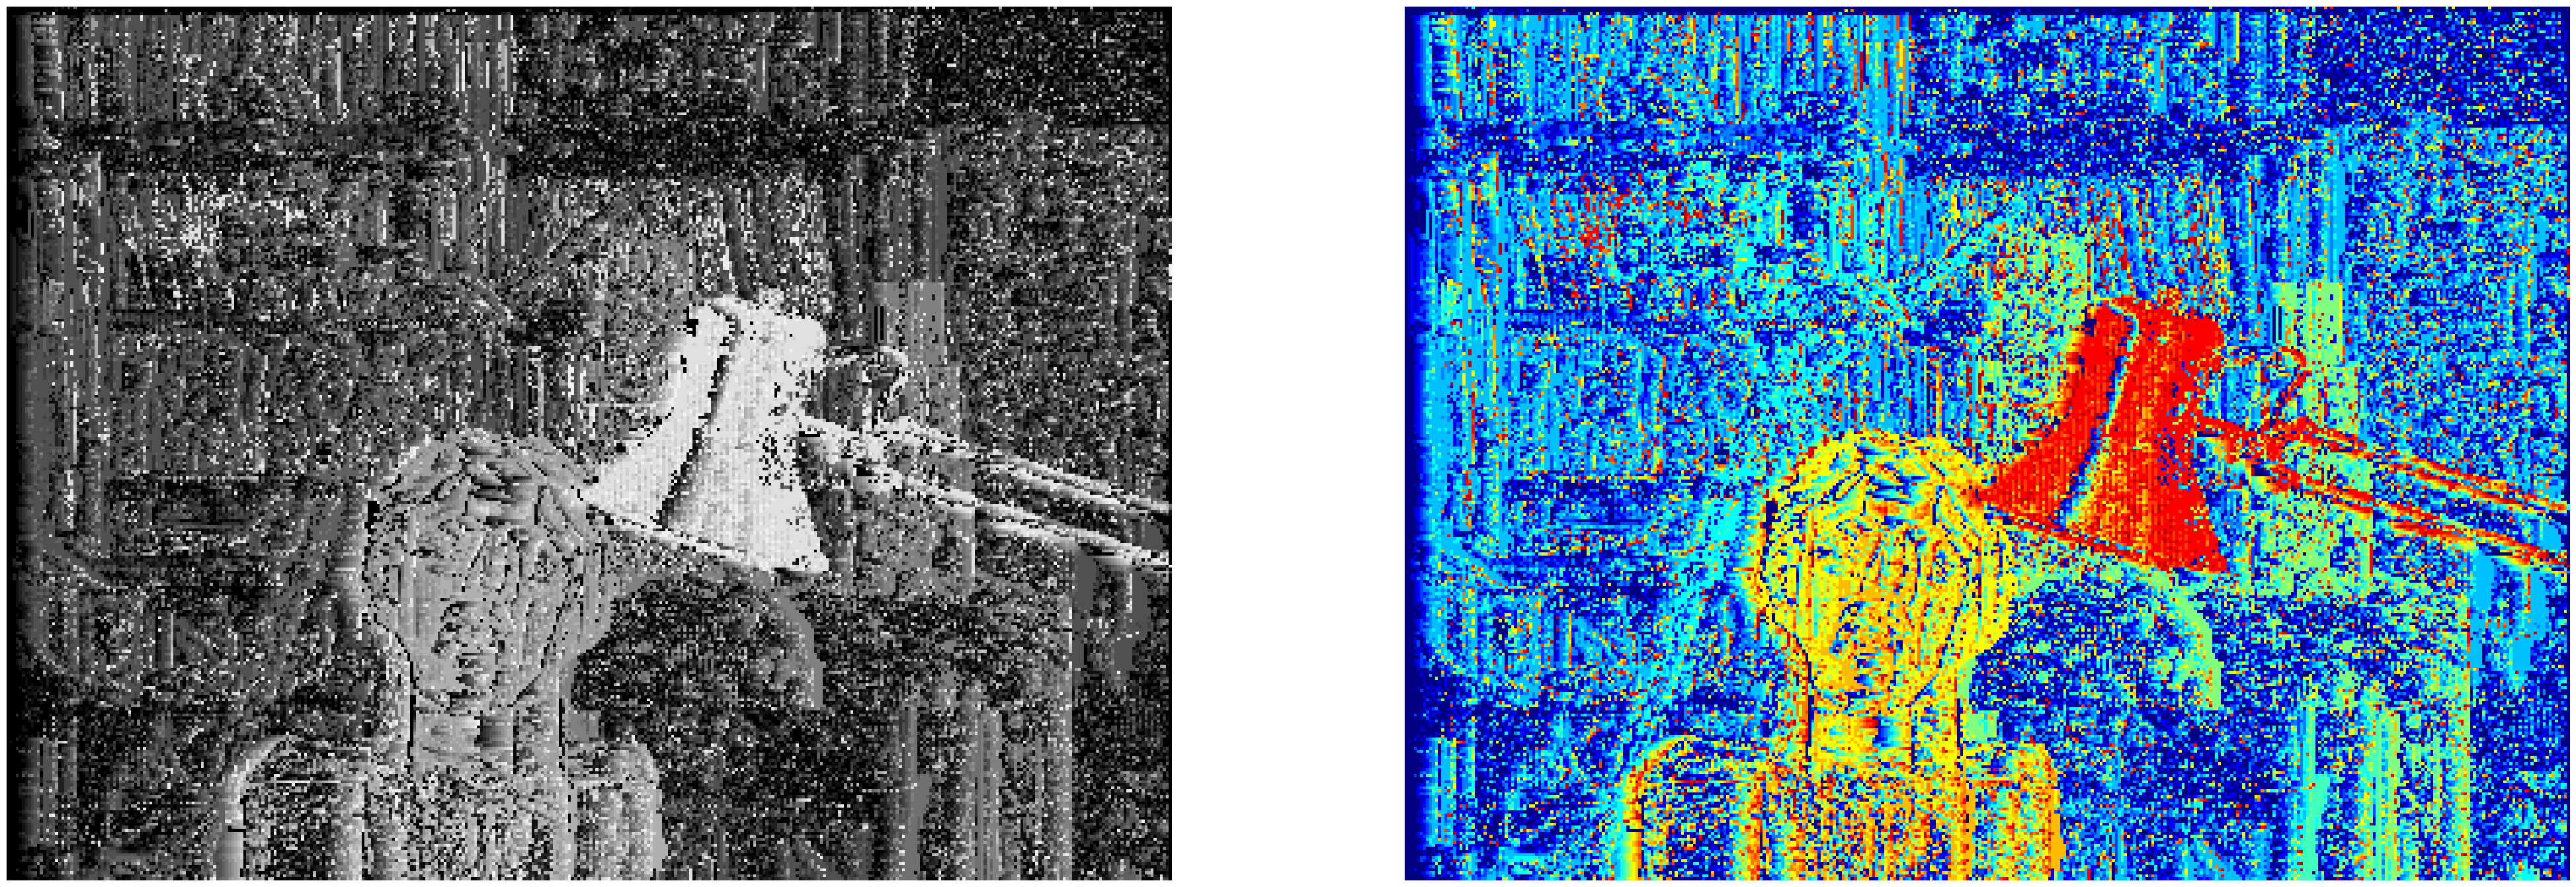

In [66]:
from PIL import Image
map3_path = 'disparity_map_l2.png'
map4_path = 'disparity_map_l2_color.png'

map3_img = Image.open(map3_path).convert('RGB')
map4_img = Image.open(map4_path).convert('RGB')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 50))
ax1.imshow(map3_img)
ax2.imshow(map4_img)
ax1.axis('off')
ax2.axis('off')

# Disparity map using Window-based matching

In [69]:
import cv2
import numpy as np

def window_based_matching(left_img_path, right_img_path, disparity_range,
                          kernel_size=5, save_result=True):
    # Read images and convert to grayscale
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * kernel_size**2

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost is minimum
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = get_l1_distance(
                                int(left[y+v, x+u]),
                                int(right[y+v, x+u - j])
                            )
                        total += value
                if total < cost_min:
                    cost_min = total
                    disparity = j
            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        # Save results
        cv2.imwrite("window_based_l1.png", depth)
        cv2.imwrite("window_based_l1_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')

    return depth

### Testing with Aloe images

In [74]:
left_img_path = 'aloe/Aloe/Aloe_left_1.png'
right_img_path = 'aloe/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

window_based_result = window_based_matching(
    left_img_path, right_img_path, disparity_range,
    kernel_size, save_result=True
)


Saving result...
Done


### Window_based matching using L1 distance

In [85]:
import cv2
import numpy as np

def window_based_matching_l1(left_img_path, right_img_path, disparity_range,
                          kernel_size=5, save_result=True):
    # Read images and convert to grayscale
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * kernel_size**2

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost is minimum
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = get_l1_distance(
                                int(left[y+v, x+u]),
                                int(right[y+v, x+u - j])
                            )
                        total += value
                if total < cost_min:
                    cost_min = total
                    disparity = j
            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        # Save results
        cv2.imwrite("window_based_l1.png", depth)
        cv2.imwrite("window_based_l1_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')

    return depth

In [86]:
left_img_path = 'aloe/Aloe/Aloe_left_1.png'
right_img_path = 'aloe/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

window_based_result_l1 = window_based_matching_l1(
    left_img_path, right_img_path, disparity_range,
    kernel_size, save_result=True
)

Saving result...
Done


(-0.5, 426.5, 369.5, -0.5)

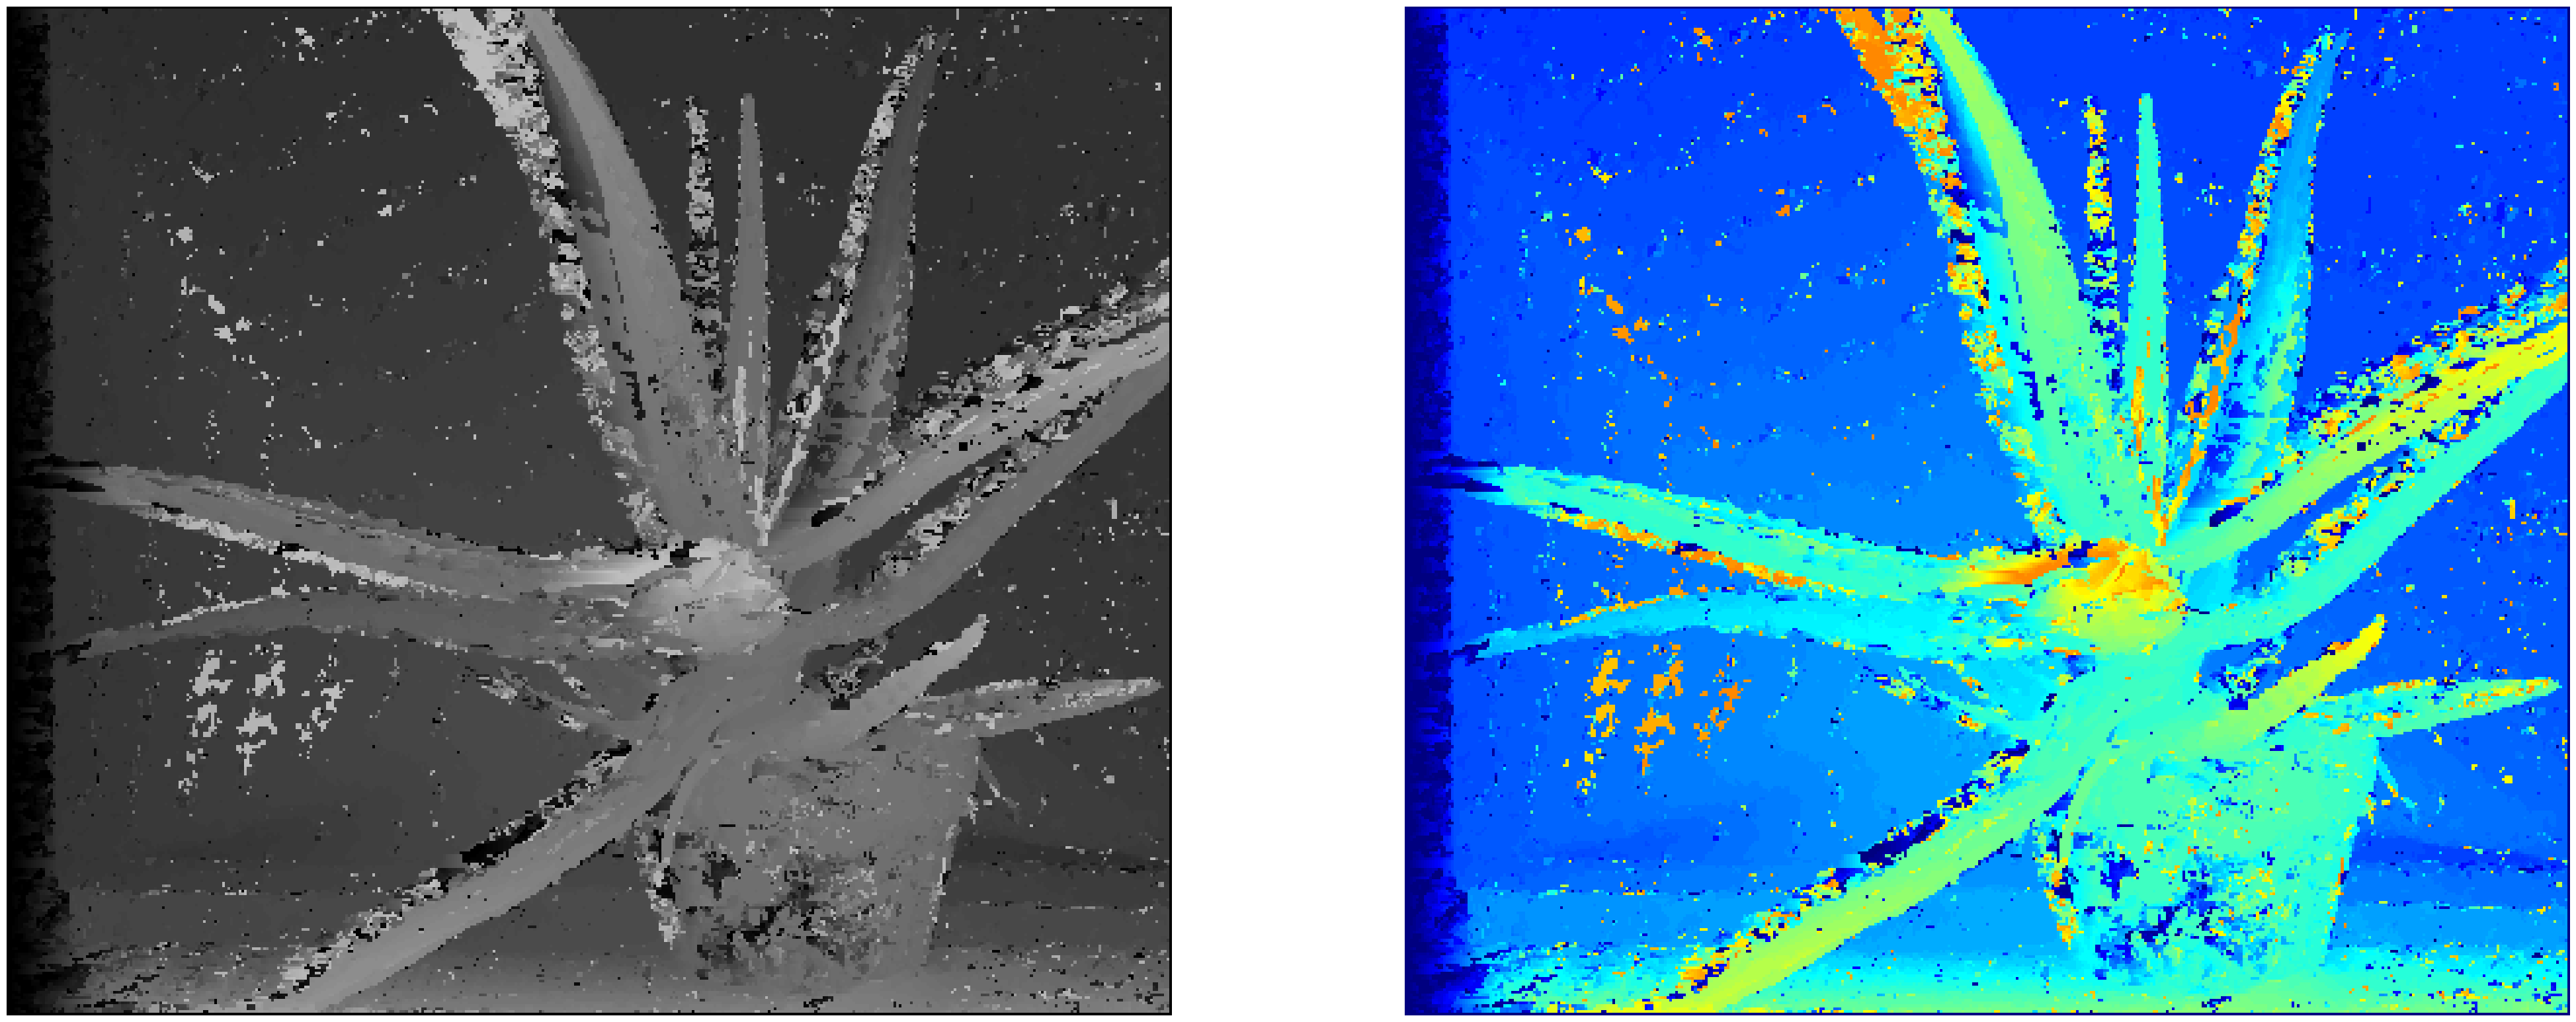

In [87]:
map5 = Image.open('window_based_l1.png').convert('RGB')
map6 = Image.open('window_based_l1_color.png').convert('RGB')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 50))
ax1.imshow(map5)
ax2.imshow(map6)
ax1.axis('off')
ax2.axis('off')

### Window based matching with L2 distance



In [88]:
import cv2
import numpy as np

def window_based_matching_l2(left_img_path, right_img_path, disparity_range,
                          kernel_size=5, save_result=True):
    # Read images and convert to grayscale
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * kernel_size**2

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost is minimum
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = get_l2_distance(
                                int(left[y+v, x+u]),
                                int(right[y+v, x+u - j])
                            )
                        total += value
                if total < cost_min:
                    cost_min = total
                    disparity = j
            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        # Save results
        cv2.imwrite("window_based_l2.png", depth)
        cv2.imwrite("window_based_l2_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')

    return depth

In [91]:
left_img_path = 'aloe/Aloe/Aloe_left_1.png'
right_img_path = 'aloe/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 5

window_based_result_l2 = window_based_matching_l2(
    left_img_path, right_img_path, disparity_range,
    kernel_size, save_result=True
)

Saving result...
Done


(-0.5, 426.5, 369.5, -0.5)

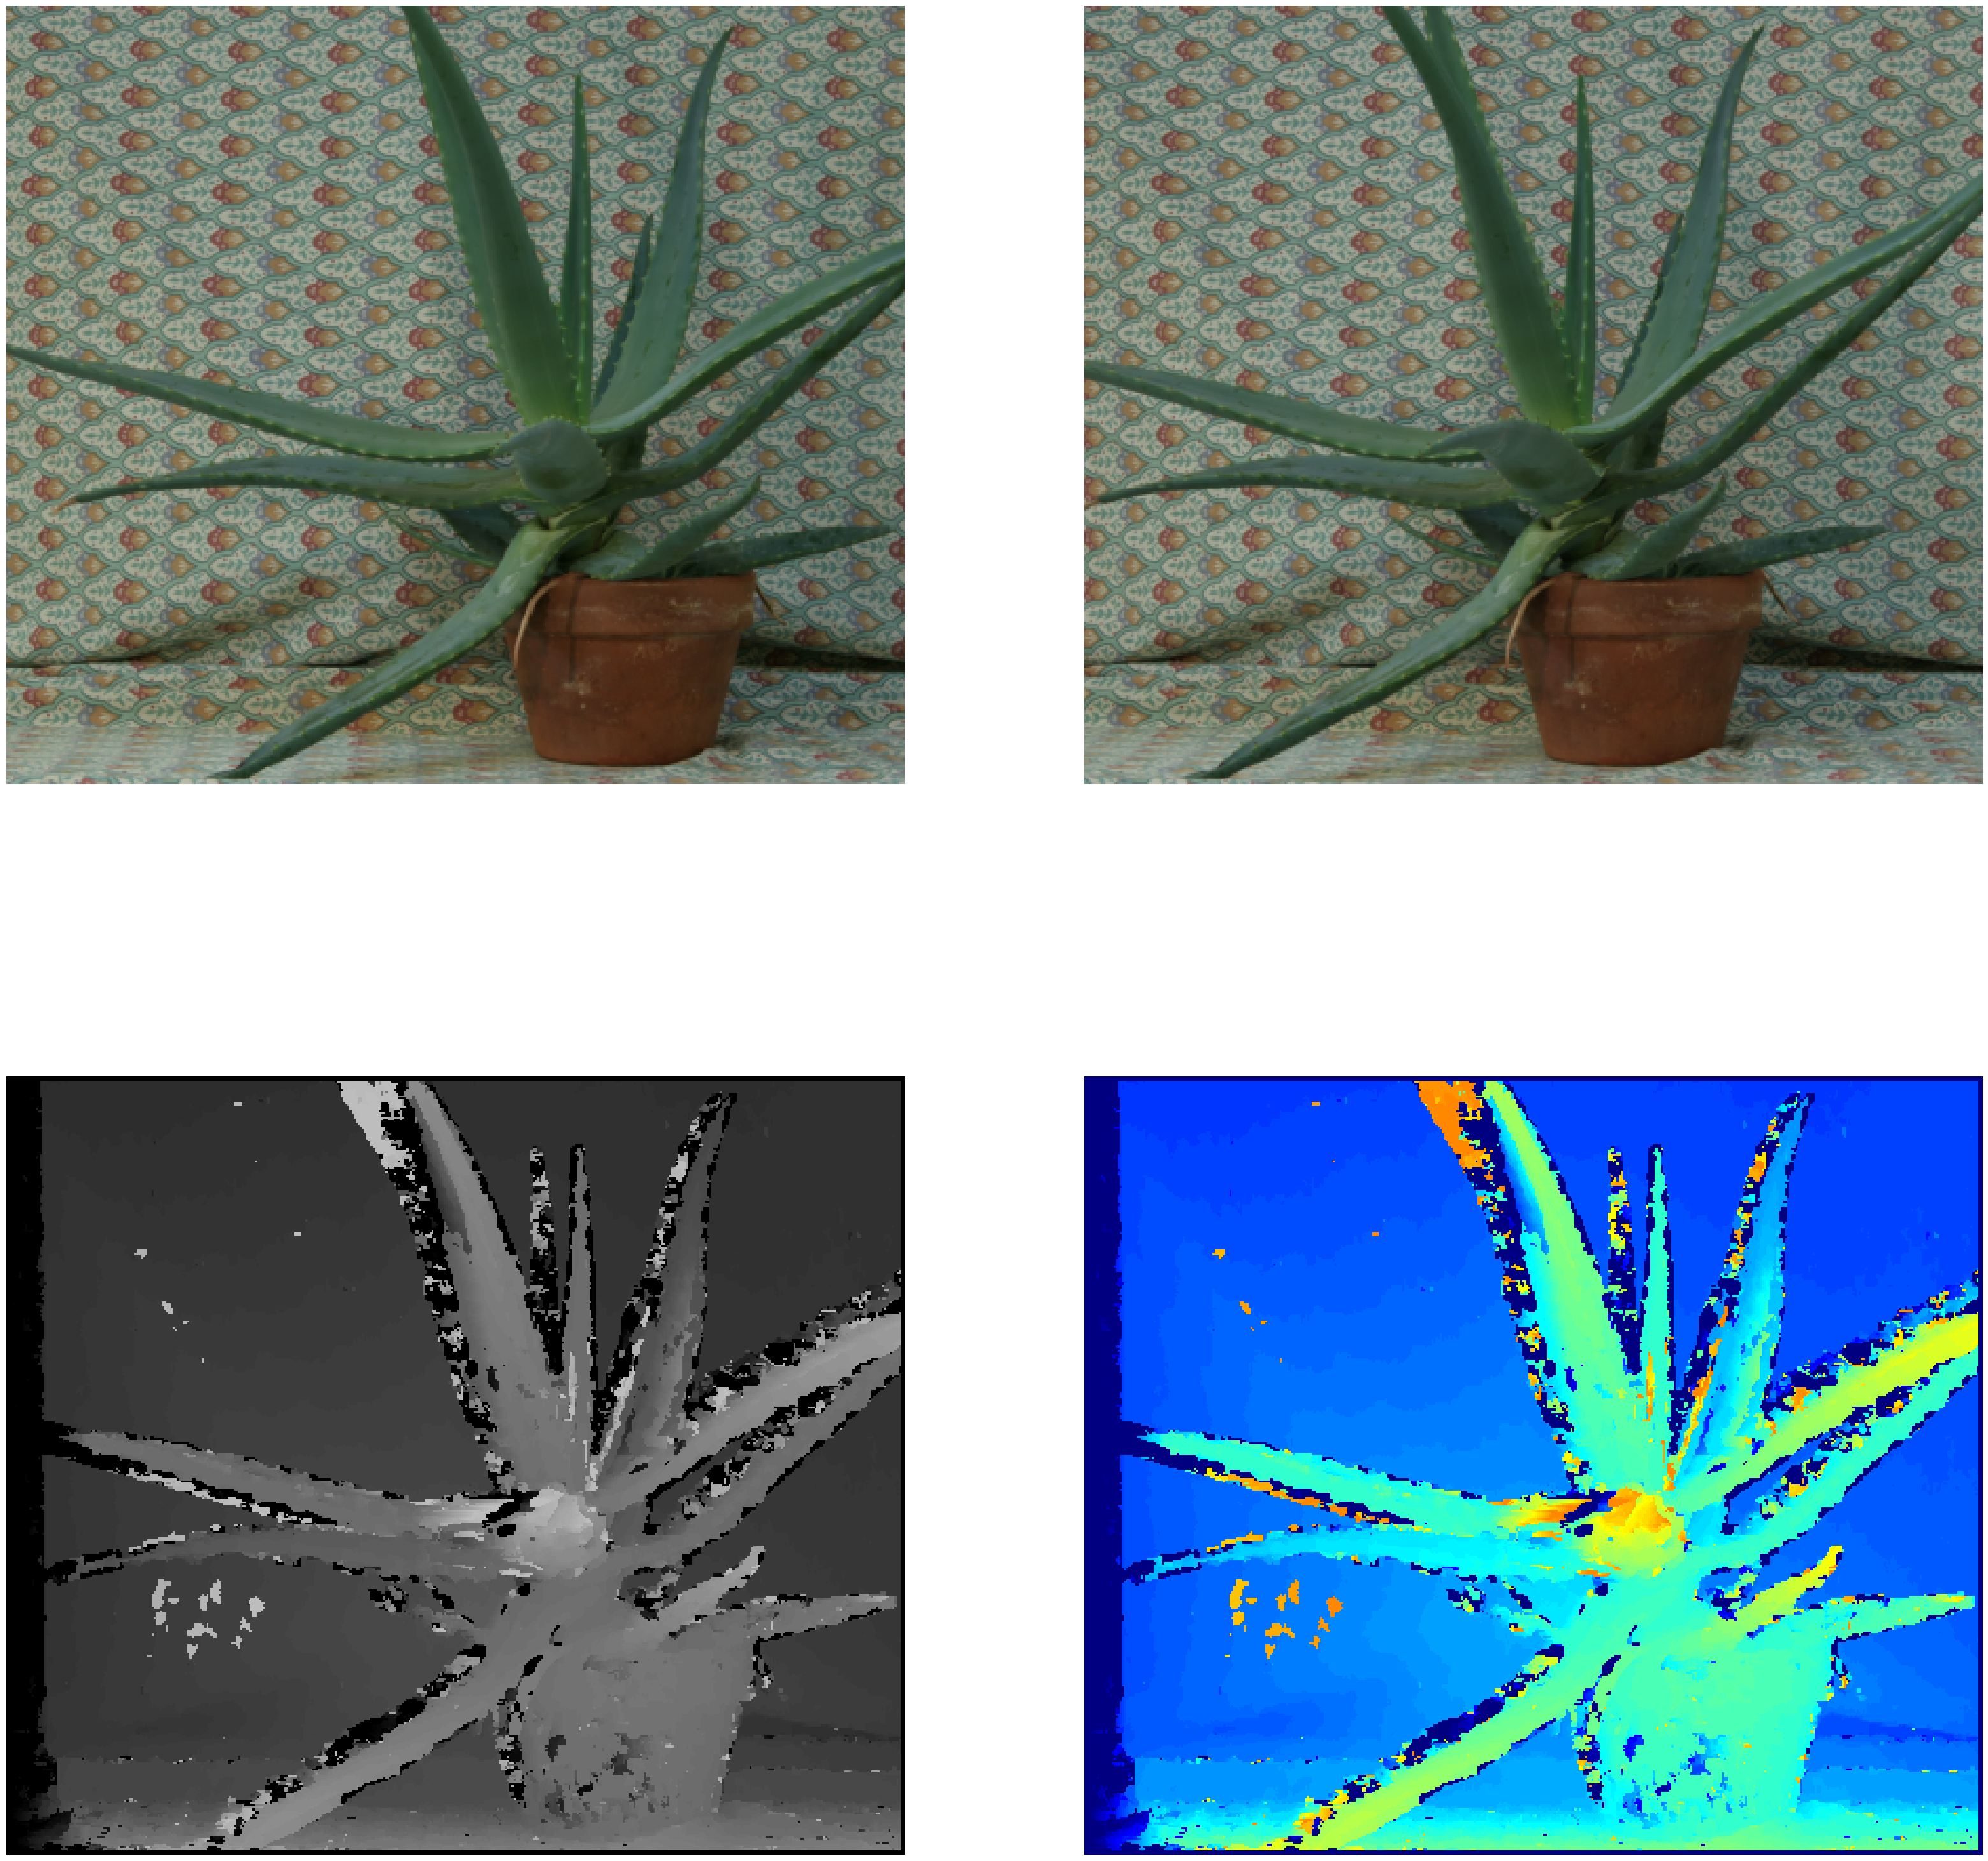

In [95]:
left = Image.open(left_img_path).convert('RGB')
right = Image.open(right_img_path).convert('RGB')
map7 = Image.open('window_based_l2.png').convert('RGB')
map8 = Image.open('window_based_l2_color.png').convert('RGB')


fig, ((ax1, ax2),( ax3, ax4)) = plt.subplots(2, 2, figsize=(40, 40))
ax1.imshow(left)
ax2.imshow(right)
ax3.imshow(map7)
ax4.imshow(map8)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

## Window-based matching with cosine similarity

In [99]:
import cv2
import numpy as np

def cosine_similarity(x, y):
    numerator = np.dot(x, y)
    denumerator = np.linalg.norm(x) * np.linalg.norm(y)

    return numerator/denumerator



In [100]:
import cv2
import numpy as np

def window_based_matching_cosine(left_img_path, right_img_path, disparity_range,
                          kernel_size=5, save_result=True):
    # Read images and convert to grayscale
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost is minimum
            disparity = 0
            cost_optimal = -1

            for j in range(disparity_range):
                d = x - j
                cost = -1

                if (d - kernel_half) > 0:
                    wp = left[
                        (y - kernel_half):(y + kernel_half + 1),
                        (x - kernel_half):(x + kernel_half + 1)
                    ]
                    wqd = right[
                        (y - kernel_half):(y + kernel_half + 1),
                        (d - kernel_half):(d + kernel_half + 1)
                    ]

                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()

                    cost = cosine_similarity(wp_flattened, wqd_flattened)
                if cost > cost_optimal:
                    cost_optimal = cost
                    disparity = j
            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        # Save results
        cv2.imwrite("window_based_cosine.png", depth)
        cv2.imwrite("window_based_cosine_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')

    return depth

In [102]:
left_img_path = 'aloe/Aloe/Aloe_left_1.png'
right_img_path = 'aloe/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 5

window_based_result_cosine = window_based_matching_cosine(
    left_img_path, right_img_path, disparity_range,
    kernel_size, save_result=True
)

Saving result...
Done


(-0.5, 426.5, 369.5, -0.5)

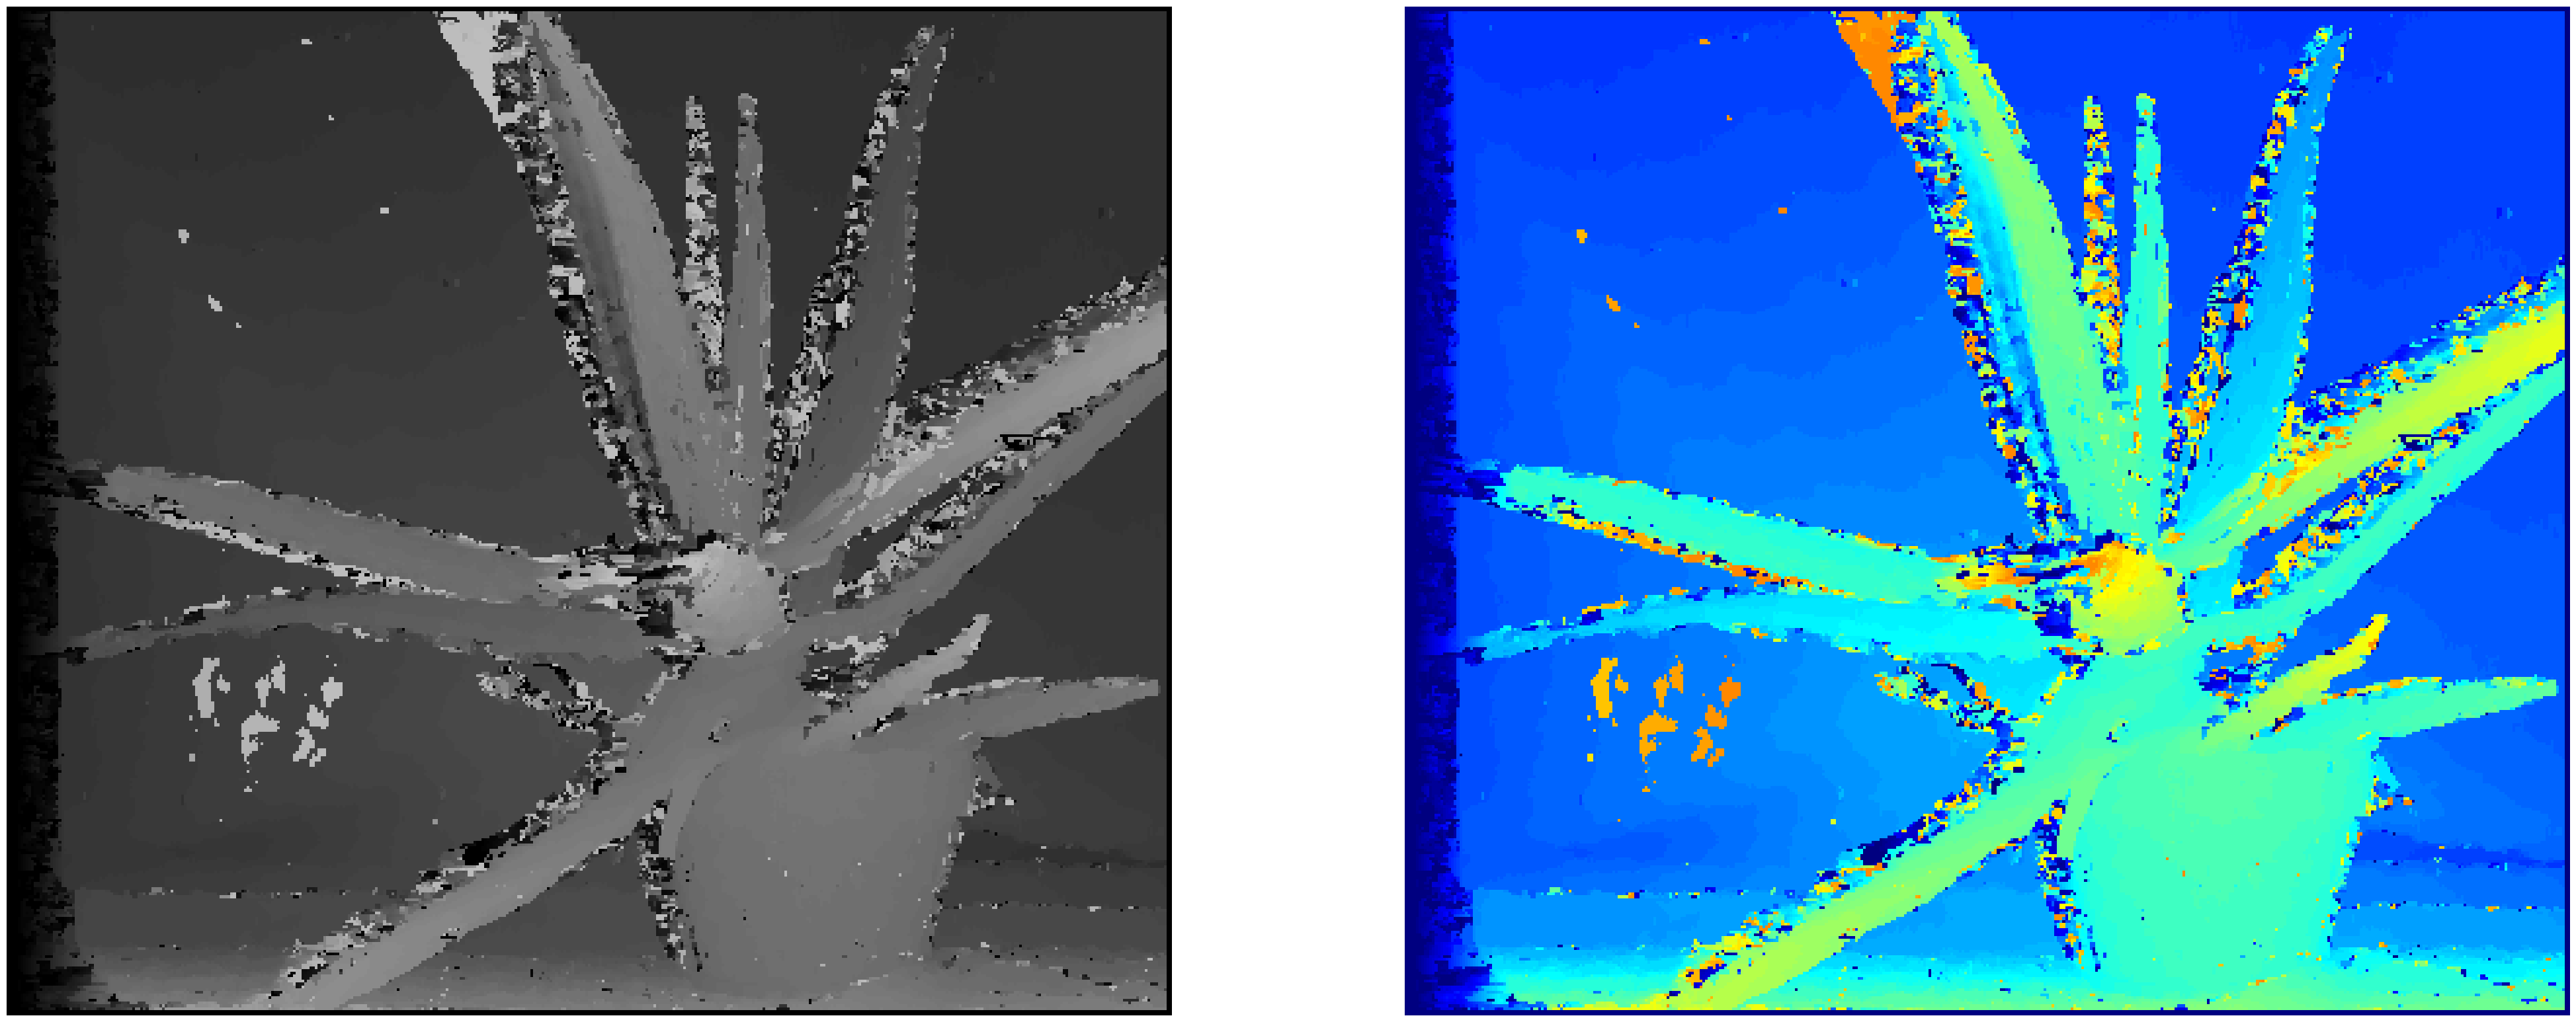

In [103]:
map9 = Image.open('window_based_cosine.png').convert('RGB')
map10 = Image.open('window_based_cosine_color.png').convert('RGB')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 50))
ax1.imshow(map9)
ax2.imshow(map10)
ax1.axis('off')
ax2.axis('off')